In [92]:
# %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as md

In [77]:
# import libraries
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [78]:
# import sqlalchemy
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [79]:
# connect to datasource
engine = create_engine('sqlite:///Resource/hawaii.sqlite')

In [80]:
Base = automap_base()

In [81]:
# reflect database into model
Base.prepare(engine, reflect=True)

Station = Base.classes.station
Measurement = Base.classes.measurement

In [82]:
session = Session(engine)

In [145]:
# get the max date for the precipitation measurement
max_date = session.query(func.max(Measurement.date)).scalar()

# calculate the date 12 months before the last date
query_start_date = dt.datetime.fromisoformat(max_date) - dt.timedelta(days=366)

# write query results to dataframe
precip_df = pd.DataFrame(session.query(Measurement.prcp, Measurement.date).filter(Measurement.date >= query_start_date).all())
precip_df.set_index('date', inplace=True)
precip_df.sort_values('date')
precip_df.rename(columns={'prcp': 'precipitation'}, inplace=True)
precip_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


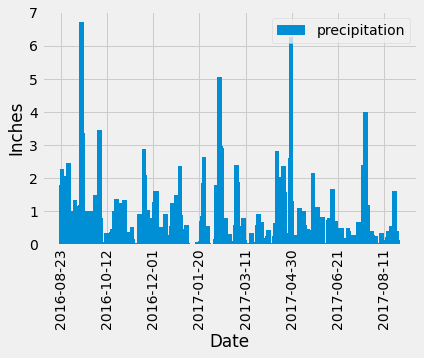

In [146]:
fig = plt.bar(precip_df.index, precip_df['precipitation'], width = 5)
plt.ylabel('Inches')
plt.xlabel('Date')
plt.legend(['precipitation'])
plt.xticks(np.arange(0, 365, 50), rotation='90')
plt.show()

In [147]:
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [161]:
num_stations = session.query(func.count(Station.station)).scalar()

obeservations_df = pd.DataFrame(session.query(Station.station, Station.name, func.count(Measurement.tobs).label('obs_count')).\
                                join(Station, Measurement.station==Station.station).\
                                order_by(func.count(Measurement.tobs).desc()).\
                                group_by(Measurement.station).all())
obeservations_df

,station,name,obs_count
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511
